#                                                 Градиентный бустинг  

 1. Что это такое?
 2. Его преимущества и недостатки
 3. Где применяется?
 4. Математическая реализация
 5. Программная реализация
 

Чтобы разобраться в нашей повестке дня, для начала нам нужно освежить свои знания:


- **Ансамбль** — это набор предсказателей, которые вместе дают ответ (например, среднее по всем). Причина почему мы используем ансамбли — несколько предсказателей, которые пытаясь получить одну и ту же переменную дадут более точный результат, нежели одиночный предсказатель. Техники ансамблирования впоследствии классифицируются в Бэггинг и Бустинг. 




- **Бэггинг** — простая техника, в которой мы строим независимые модели и комбинируем их, используя некоторую модель усреднения (например, взвешенное среднее, голосование большинства или нормальное среднее). Обычно берут случайную подвыборку данных для каждой модели, так все модели немного отличаются друг от друга. Выборка строится по модели выбора с возвращением. Из-за того, что данная техника использует множество некореллириющих моделей для построения итоговой модели, это уменьшает variance. Примером бэггинга служит модель случайного леса (Random Forest, RF) 




- **Бустинг** — это техника построения ансамблей, в которой предсказатели построены не независимо, а последовательно. Эта техника использует идею о том, что следующая модель будет учиться на ошибках предыдущей. Они имеют неравную вероятность появления в последующих моделях, и чаще появятся те, что дают наибольшую ошибку. Предсказатели могут быть выбраны из широкого ассортимента моделей, например, деревья решений, регрессия, классификаторы и т.д. Из-за того, что предсказатели обучаются на ошибках, совершенных предыдущими, требуется меньше времени для того, чтобы добраться до реального ответа. Но мы должны выбирать критерий остановки с осторожностью, иначе это может привести к переобучению. Градиентный бустинг — это пример бустинга. 


Перейдем к первому пункту: 

   **Градиентный бустинг** — сильный алгоритм машинного обучения. Суть метода заключается в построении ансамбля слабых моделей (например, деревьев принятия решений), в которых (в отличие от бэггинга) модели строятся не независимо (параллельно), а последовательно. Говоря простым языком, это означает, что следующее дерево учится на ошибках предыдущего, затем этот процесс повторяется, наращивая количество **слабых** моделей. Таким образом, получается сильная модель, способная к обобщению на разнородных данных.
 
   **Слабые модели** — это произвольные алгоритмы машинного обучения, точность которых может быть лишь немногим выше случайного угадывания

Сразу можем ответить на 3-й вопрос: область применения градиентного бустинга - решение задач классификации и регрессии.


"Разобраться" со вторым нам предстоит в конце 

### Математическая реализация


Прежде чем приступить к математике, опишем алгоритм словами
- 1- Модель строится по подборке данных.
- 2- Эта модель делает предсказания для всего набора данных.
- 3- По предсказаниям и истинным значениям вычисляются ошибки.
- 4- Новая модель строится с учетом ошибок целевых переменных. При этом мы стремимся найти лучшее разделение для минимизации ошибки.
- 5- Предсказания, сделанные с помощью этой новой модели, сочетаются с предсказаниями предыдущих.
- 6- Снова вычисляются ошибки с использованием этих предсказанных значений и истинных значений.
- 7- Этот процесс повторяется, пока функция ошибки не перестанет меняться или пока не будет достигнуто максимальное число предикторов.

Давайте обратимся к математике градиентного бустинга, но сначала рассмотрим **градиентный спуск**. Пусть, например, в качестве функции потерь будет среднеквадратичная ошибка (MSE):

$$Loss = MSE = \sum{}(y_i - y_i^p)^2$$
Где $y_i$ - i-ое целевое значение, а $y_i^p$ - предсказанное значение

Мы хотим построить наши предсказания таким образом, чтобы MSE была минимальна. Используя градиентный спуск и обновляя предсказания, основанные на скорости обучения (learning rate), ищем значения, на которых MSE минимальна.

$$y_i^p=y_i^p+α∗δL(y_i,y_i^p)/δy_i^p$$

Откуда следует: 

$$y_i^p=y_i^p−α∗2∗∑(y_i−y_i^p)$$

Итак, мы просто обновляем предсказания таким образом, что сумма наших отклонений стремилась к нулю и предсказанные значения были близки к реальным

Рассмотрим **градиентный бустинг**
Но вход нам подаются: 
 
- Набор данных $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,n}$
- число итераций $M$
- выбор функции потерь $\large L(y, f)$  с выписанным градиентом
- выбор семейства функций базовых алгоритмов $\large h(x, \theta)$ , с процедурой их обучения;
- дополнительные гиперпараметры  $\large h(x, \theta)$  , например, глубина дерева у деревьев решений

$$\large y \approx \hat{f}(x), \\ \large \hat{f}(x) = \underset{f(x)}{\arg\min} \ L(y,f(x))$$
    
    
$$\large \hat{f}(x) = \underset{f(x)}{\arg\min} \ \mathbb {E} _{x,y}[L(y,f(x))]$$
    
    
$$\large \hat{f}(x) = f(x, \hat{\theta}), \\ \large \hat{\theta} = \underset{\theta}{\arg\min} \ \mathbb {E} _{x,y}[L(y,f(x,\theta))]$$
    
    
$$\large \hat{\theta} = \sum_{i = 1}^M \hat{\theta_i}, \\ \large L_{\theta}(\hat{\theta}) = \sum_{i = 1}^N L(y_i,f(x_i, \hat{\theta}))$$
    
    
    
    
    
 

Дело за малым — осталось только взять подходящий итеративный алгоритм, которым мы будем минимизировать $\large L_{\theta}(\hat{\theta})$ . Самый простой и часто используемый вариант — **градиентный спуск**. Для него нужно выписать градиент $\large \nabla L_{\theta}(\hat{\theta})$  и добавлять наши итеративные оценки $\large \hat{\theta_i}$ вдоль него (со знаком минус — мы же хотим уменьшить ошибку, а не нарастить). И все, надо только как-то инициализировать наше первое приближение $\large \hat{\theta_0}$  и выбрать, сколько итераций $\large M$  мы эту процедуру будем продолжать. В нашем неэффективном по памяти виде хранения приближений $\large \hat{\theta}$ алгоритм будет выглядеть следующим образом:

- 1.Инициализировать начальное приближение параметров $\large \hat{\theta} = \hat{\theta_0}$
- 2.Для каждой итерации $\large t = 1, \dots, M$ повторять:
    
  1.Посчитать градиент функции потерь $\large \nabla L_{\theta}(\hat{\theta})$  при текущем приближени $\large \hat{\theta}$:

$$\large \nabla L_{\theta}(\hat{\theta}) = \left[\frac{\partial L(y, f(x, \theta))}{\partial \theta}\right]_{\theta = \hat{\theta}}$$
   
   2.Задать текущее итеративное приближение $\large \hat{\theta_t}$ на основе посчитанного градиента:
    
$$\large \hat{\theta_t} \leftarrow −\nabla L_{\theta}(\hat{\theta})$$
    
   3.Обновить приближение параметров $\large \hat{\theta}$ :
   
$$\large \hat{\theta} \leftarrow \hat{\theta} + \hat{\theta_t} = \sum_{i = 0}^t \hat{\theta_i}$$

- 3.Сохранить итоговое приближение  $\large \hat{\theta}$:

$$\large \hat{\theta} = \sum_{i = 0}^M \hat{\theta_i}$$

- 4.Пользоваться найденной функцией по назначению $$\large \hat{f}(x) = f(x, \hat{\theta})$$ 


Давайте будем искать наше приближение $\large \hat{f}(x)$ не в виде одной большой модели с кучей параметров (как, например, нейросеть), а в виде суммы функций, делая вид, что таким образом мы двигаемся в функциональном пространстве.

$$\large \hat{f}(x) = \sum_{i = 0}^M \hat{f_i}(x)$$

Чтобы решить задачу, нам все равно придется ограничить свой поиск каким-то семейством функций $\large \hat{f}(x) = h(x, \theta)$. Но, во-первых, сумма моделей может быть сложнее чем любая модель из этого семейства (сумму двух деревьев-пней глубины 1 уже не приблизить одним пнем). Во-вторых, общая задача все еще происходит в функциональном пространстве. Сразу учтем, на каждом шаге для функций нам понадобится подбирать оптимальный коэффициент $\large \rho \in \mathbb{R}$ . Для шага $\large t$ задача выглядит следующим образом:

$$\large \hat{f}(x) = \sum_{i = 0}^{t-1} \hat{f_i}(x), \\ \large (\rho_t,\theta_t) = \underset{\rho,\theta}{\arg\min} \ \mathbb {E} _{x,y}[L(y,\hat{f}(x) + \rho \cdot h(x, \theta))], \\ \large \hat{f_t}(x) = \rho_t \cdot h(x, \theta_t)$$

Мы выписывали все наши задачи в общем виде, словно мы можем просто так брать и обучать какие угодно модели $\large h(x, \theta)$ относительно каких угодно функций потерь $\large L(y, f(x, \theta))$. На практике это крайне сложно, поэтому был придуман простой способ свести задачу к чему-то решаемому.

Зная выражение градиента функции потерь, мы можем посчитать его значения на наших данных. Так давайте обучать модели так, чтобы наши предсказания были наиболее скоррелированными с этим градиентом (со знаком минус). То есть будем решать задачу МНК-регрессии, пытаясь выправлять предсказания по этим остаткам. И для классификации, и для регрессии, и для ранжирования под капотом мы все время будем минимизировать квадрат разности между псевдо-остатками $\large r$ и нашими предсказаниями. Для шага $\large t$  итоговая задача выглядит следующим образом:

$$\large \hat{f}(x) = \sum_{i = 0}^{t-1} \hat{f_i}(x), \\ \large r_{it} = -\left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)}, \quad \mbox{for } i=1,\ldots,n ,\\ \large \theta_t = \underset{\theta}{\arg\min} \ \sum_{i = 1}^{n} (r_{it} - h(x_i, \theta))^2, \\ \large \rho_t = \underset{\rho}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \hat{f}(x_i) + \rho \cdot h(x_i, \theta_t))$$

Исходя из всего этого мы можем подойти к алгоритму Фридмана:
    
   На вход алгоритма нужно собрать несколько составляющих:
        
- набор данных $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,n}$ ;

- число итераций $\large M$ ;

- выбор функции потерь  с выписанным градиентом $\large L(y, f)$;

- выбор семейства функций базовых алгоритмов , с процедурой их обучения $\large h(x, \theta)$;

- дополнительные гиперпараметры $\large h(x, \theta)$, например, глубина дерева у деревьев решений;

Единственный момент, который остался без внимания — начальное приближение $\large f_0(x)$ . Для простоты, в качестве инициализации используют просто константное значение $\large \gamma$ . Его, а также оптимальный коэффициент $\large \rho$ находят бинарным поиском, или другим line search алгоритмом относительно исходной функции потерь (а не градиента). Итак, GBM алгоритм:

- Инициализировать GBM константным значением $\large \hat{f}(x) = \hat{f}_0, \hat{f}_0 = \gamma, \gamma \in \mathbb{R}$
$$\large \hat{f}_0 = \underset{\gamma}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \gamma)$$

- Для каждой итерации $\large t = 1, \dots, M$ повторять:

    Посчитать псевдо-остатки $\large r_t$
$$\large r_{it} = -\left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)}, \quad \mbox{for } i=1,\ldots,n$$
    
    Построить новый базовый алгоритм $\large h_t(x)$ как регрессию на псевдо-остатках 
$$\large \left\{ (x_i, r_{it}) \right\}_{i=1, \ldots,n}$$
    
    Найти оптимальный коэффициент $\large \rho_t$  при $\large h_t(x)$ относительно исходной функции потерь
$$\large \rho_t = \underset{\rho}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \hat{f}(x_i) + \rho \cdot h(x_i, \theta))$$
    
    Сохранить $\large \hat{f_t}(x) = \rho_t \cdot h_t(x)$
    
    Обновить текущее приближение $\large \hat{f}(x)$
$$\large \hat{f}(x) \leftarrow \hat{f}(x) + \hat{f_t}(x) = \sum_{i = 0}^{t} \hat{f_i}(x)$$
    
- Скомпоновать итоговую GBM модель $\large \hat{f}(x)$
$$\large \hat{f}(x) = \sum_{i = 0}^M \hat{f_i}(x)$$


### Для каждой своей задачи подбирается соответствующая Loss функция: 

### Для задач регрессии: 

- $\large L(y, f) = (y - f)^2$ оно же $\large L_2$  loss, оно же Gaussian loss. Это классическое условное среднее, самый частый и простой вариант. Если нет никакой дополнительной информации или требований к устойчивости (робастности) модели — используйте его.



- $\large L(y, f) = |y - f|$ оно же $\large L_1$  loss, оно же Laplacian loss. Эта, на первый взгляд, не очень дифференцируемая вещь, на самом деле определяет условную медиану. Медиана, как мы знаем, более устойчива к выбросам, поэтому в некоторых задачах эта функция потерь предпочтительнее, так как она не так сильно штрафует большие отклонения, нежели квадратичная функция.



- $\large \begin{equation} L(y, f) =\left\{ \begin{array}{@{}ll@{}} (1 - \alpha) \cdot |y - f|, & \text{if}\ y-f \leq 0 \\ \alpha \cdot |y - f|, & \text{if}\ y-f >0 \end{array}\right. \end{equation}, \alpha \in (0,1)$ оно же $\large L_q$ loss, оно же Quantile loss. Если бы мы, допустим, захотели не условную медиану с , а условную 75%-квантиль, мы бы воспользовались этим вариантом с . Можно видеть, что эта функция ассиметрична и больше штрафует наблюдения, оказывающиеся по нужную нам сторону квантили.

### Для задач классификации: 

- $\large L(y, f) = log(1 + exp(-2yf))$  она же Logistic loss, она же Bernoulli loss. Интересное свойство заключается в том, что мы штрафуем даже корректно предсказанные метки классов. Нет, это не баг. Наоборот, оптимизируя эту функцию потерь, мы можем продолжать "раздвигать" классы и улучшать классификатор даже если все наблюдения предсказаны верно. Это самая стандартная и часто используемая функция потерь в бинарной классификации.


- $\large L(y, f) = exp(-yf)$  оно же Adaboost loss. Так получилось, что классический Adaboost алгоритм эквивалентен GBM с этой функцией потерь. Концептуально эта функция потерь очень похожа на Logistic loss, но имеет более жесткий экспоненциальный штраф на ошибки классификации и используется реже.

Подведем итоги по Градиентному бустингу - это не просто какой-то конкретный алгоритм, а общая методология, как строить ансамбли моделей. Причем методология достаточно гибкая и расширяемая: можно обучать большое количество моделей с учетом различных функций потерь и при этом еще и навешивать на них разного рода весовые функции.

# Программная реализация 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from random import random

In [2]:
length = 800 #длина синуса по x
data = np.array([[np.sin(i/10)+random() for j in range(5)] #создание шума
                 + [np.sin(i/10)] for i in range(length)]) #создание вектора синусов
X, y = data[:,:-1],data[:,-1]

In [3]:
test_size = 0.05
test_size = int(1 / test_size)
X_train, X_test, y_train, y_test = (X[:length//test_size], X[length//test_size:],
                                    y[:length//test_size], y[length//test_size:])

params = {'n_estimators': 5000, #количество деревьев в лесу
          'max_depth': 2,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [4]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: {:.4f}".format(mse))

MSE: 0.0428


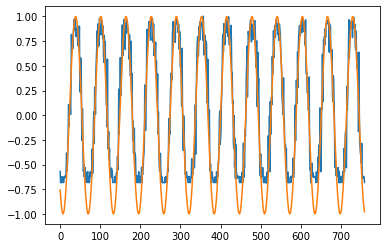

In [5]:
plt.plot(reg.predict(X_test))
plt.plot(y_test)

In [6]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7,
                                                   random_state = 5)
params = {'n_estimators': 100,
          'max_depth': 2,
          'min_samples_split': 4,
          'learning_rate': 0.4,
          'loss': 'deviance',
          'criterion': 'friedman_mse'}

In [8]:
clas = ensemble.GradientBoostingClassifier(**params)
clas.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=2, min_samples_split=4)

In [9]:
clas.score(X_test,y_test)

0.9435612082670907

[1, 1]

<Figure size 432x288 with 0 Axes>

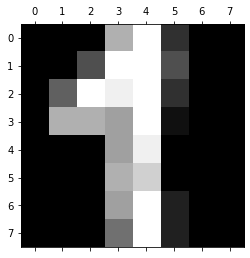

In [11]:
index = 15
plt.gray()
plt.matshow(A = digits.images[np.where(np.all(digits.data==X_test[index],
                                            axis=1))[0][0]],fignum=None)
[y_test[index],clas.predict(X_test)[index]]